# Yolact visualizer
extracted from: https://github.com/dbolya/yolact/issues/78

In [1]:
import matplotlib.pyplot as plt
from utils.logger import LogVisualizer
vis = LogVisualizer()

In [2]:
log_file = '/home/josmar/proyectos/yolact/logs/yolact_pp_101_rc_ucb_gait.log'

Each log file is split into training "sessions" where every time you restart / resume from training with the same config it opens up a new session. To check what sessions a log file has, simply run:

In [3]:
vis.sessions(log_file)

Session   0:      425 entries | 0:02:52 elapsed
Session   1:    67633 entries | 9:22:25 elapsed


This will print out all the sessions in the log file along with how many iterations (entries) and the time elapsed in training that session. If you have resumed from training, you can also use multiple sessions, so pick out the session ids you want to use and then load that session (or sessions) with:

In [4]:
vis.add(log_file, session=1) # If multiple sessions, use a list of ids (14 and 19 is the longest)yolact_base.log(32 has square dataset)
#logs/yolact_plus_resnet101_ucb_gait.log  Session 5 is square and the longest 3/11/20  

If you want to compare multiple different logs / sessions, you can simply add more logs to the visualizer in the same way. Then, to plot the total training loss you can go:

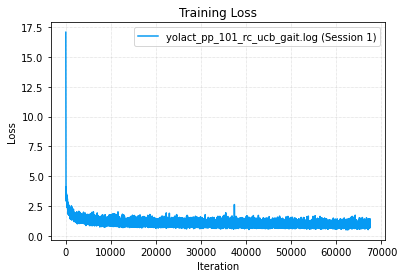

In [5]:
# train_fig = vis.plot('train', 'x.data.iter * s.data.batch_size', 'x.data.loss.T', smoothness=1000)
train_fig = vis.plot('train', 'x.data.iter', 'x.data.loss.T', smoothness=10)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training Loss")
# plt.savefig("/media/josmar/Nuevo vol/Taller de Grado/Elementos presentación/Videos_evidencia/yolact_plots/train_resnet101_ucb_gait.svg")
plt.show()

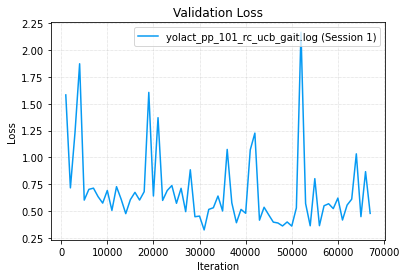

In [6]:
val_loss_fig = vis.plot('val_loss', 'x.data.iter ', 'x.data.loss.T', smoothness=1)

plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Validation Loss")
# plt.savefig("/media/josmar/Nuevo vol/Taller de Grado/Elementos presentación/Videos_evidencia/yolact_plots/val_resnet101_ucb_gait.svg")
plt.show()

You can adjust the smoothness parameter as desired. The parameters are entry type ("train"), x axis (here, the number of total images by using iterations * batch_size), and the y axis (the total loss, you can change this to any of the short codes for the other losses, e.g. "M" for mask).

For whatever reason I wrote a whole query system for this but I guess I'll explain that in the full guide instead ¯\_(ツ)_/¯

To plot the validation accuracy over training, you can go:

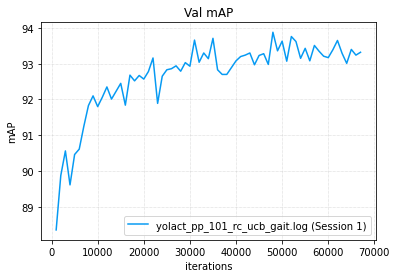

In [7]:
# val_fig = vis.plot('val', 'x.data.epoch', 'x.data.mask["all"]')
val_fig = vis.plot('val', 'x.data.iter ', 'x.data.mask["all"]')

plt.xlabel("iterations")
plt.ylabel("mAP")
plt.title("Val mAP")
# plt.savefig("/media/josmar/Nuevo vol/Taller de Grado/Elementos presentación/Videos_evidencia/yolact_plots/val_mAP_resnet101_ucb_gait.svg")
plt.show()

This will plot the 0.5:0.05:0.9 mAP metric for mask. You can change the x axis to box["all"] for the same but box mAP, and you can also put numbers instead of all for different IoUs (e.g., x.data.mask["50"] for 0.5 IoU).

You can also do bar plots for a specific epoch with

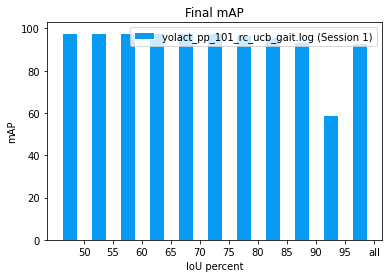

In [8]:
vis.bar('val', 'x.data.mask', x_idx=-1)
plt.xlabel("IoU percent")
plt.ylabel("mAP")
plt.title("Final mAP")
# plt.savefig("/media/josmar/Nuevo vol/Taller de Grado/Elementos presentación/Videos_evidencia/yolact_plots/final_mAP_resnet101_ucb_gait.svg")
plt.show()

which will plot all the mask IoU APs for the last entry in validation (use 0 for first, etc. and use box instead of mask for box APs).

There's a lot more you can do with this, but I haven't gotten around to writing a full guide. And hmm I should include this as a notebook huh.